# Exploratory Data Analysis

## 1. Packages

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import matplotlib.ticker as ticker
import seaborn as sns
from scipy.stats import chi2_contingency
sns.set_style('darkgrid')

## 2. Data Reading

Here, the data generated on the Feature Engineering notebook is loaded.

In [2]:
data = pd.read_pickle('../Data/data_engineered.pkl')

In [3]:
data.head()

,store,day_of_week,date,sales,promo,state_holiday,school_holiday,store_type,assortment,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,is_promo,year,month,day,week_of_year,year_week,competition_since,competition_time_month,promo_since,promo_time_week
0,1,5,2015-07-31,5263,1,regular_day,1,c,basic,1270.0,9,2008,0,31,2015,0,2015,7,31,31,2015-30,2008-09-01,84,2015-07-27,0
1,2,5,2015-07-31,6064,1,regular_day,1,a,basic,570.0,11,2007,1,13,2010,1,2015,7,31,31,2015-30,2007-11-01,94,2010-03-22,279
2,3,5,2015-07-31,8314,1,regular_day,1,a,basic,14130.0,12,2006,1,14,2011,1,2015,7,31,31,2015-30,2006-12-01,105,2011-03-28,226
3,4,5,2015-07-31,13995,1,regular_day,1,c,extended,620.0,9,2009,0,31,2015,0,2015,7,31,31,2015-30,2009-09-01,71,2015-07-27,0
4,5,5,2015-07-31,4822,1,regular_day,1,a,basic,29910.0,4,2015,0,31,2015,0,2015,7,31,31,2015-30,2015-04-01,4,2015-07-27,0


## 3. Univariate Analysis

### 3.1 Target Variable

First, let's analyse the Sales, our Target Variable, by plotting it's distribution.

<AxesSubplot:xlabel='sales', ylabel='Density'>

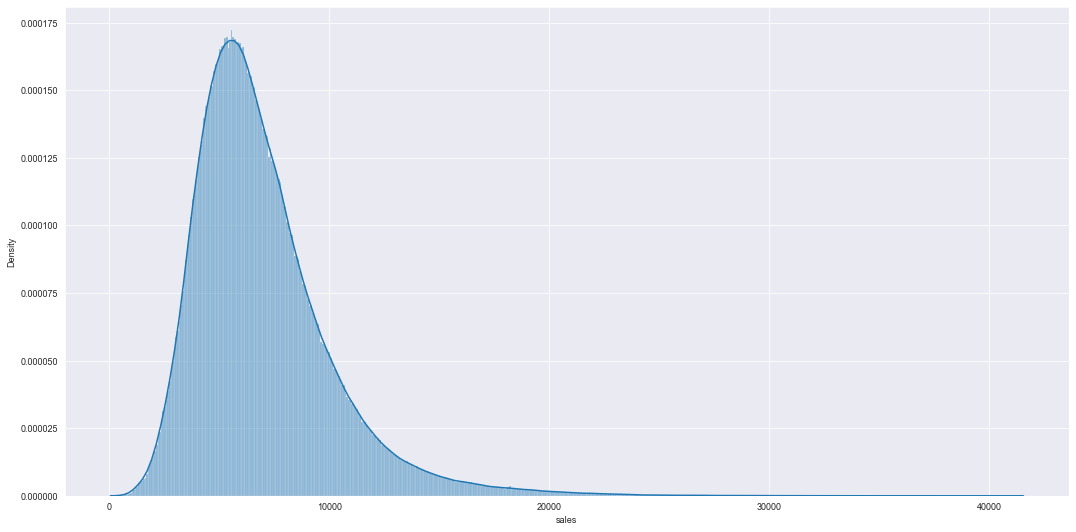

In [4]:
sns.histplot(data['sales'],stat='density',kde=True)

### 3.2 Numeric Variables

For the Numeric variables, let's check their distribution behaviour using some bar plots.

In [5]:
num_attributes = data.select_dtypes(include=['int64','float64'])

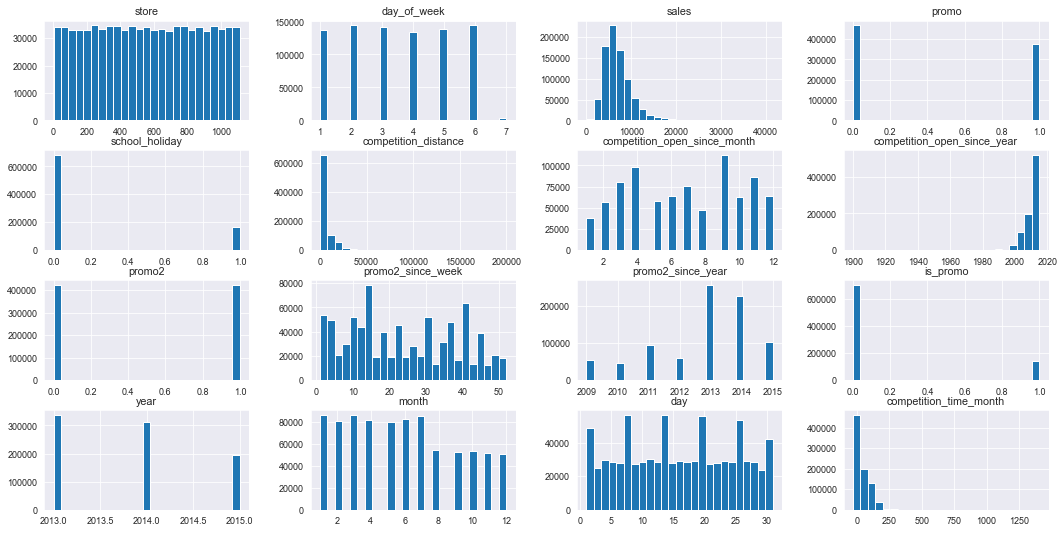

In [6]:
num_attributes.hist(bins=25);

### 3.3 Categorical Variables

For the Categorical Variables, their distribution is analised both in terms of Counts (Bar Plots) and Sales Density (KDE Plots).

In [7]:
cat_attributes = data.select_dtypes(exclude=['int64','float64','datetime64[ns]'])

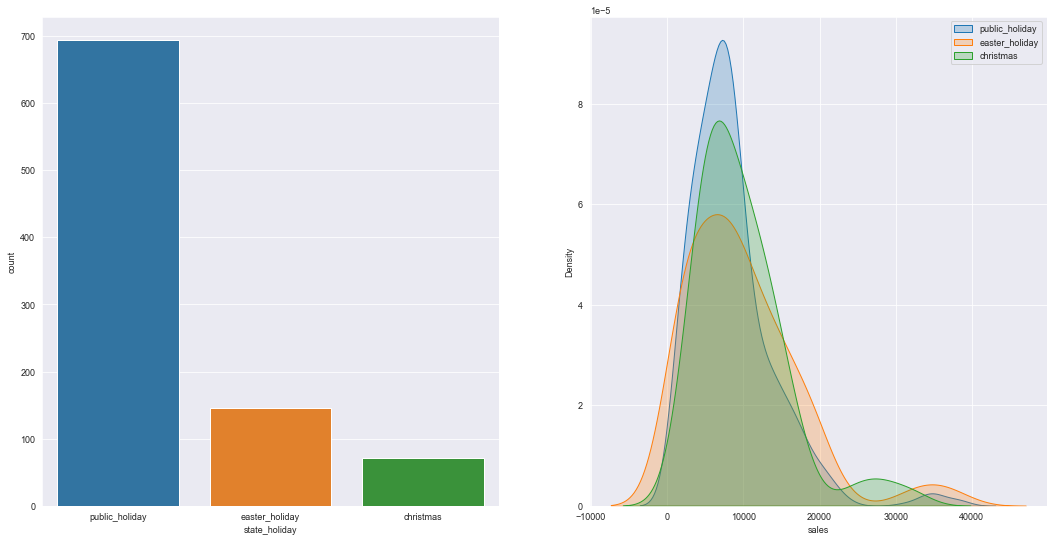

In [8]:
plt.subplot(1,2,1)
plot_data = data[data['state_holiday'] != 'regular_day']
sns.countplot(x=plot_data['state_holiday']);

plt.subplot(1,2,2)
plot_data = data[data['state_holiday'] == 'public_holiday']['sales']
sns.kdeplot(x=plot_data,label='public_holiday',shade=True);

plot_data = data[data['state_holiday'] == 'easter_holiday']['sales']
sns.kdeplot(x=plot_data,label='easter_holiday',shade=True);

plot_data = data[data['state_holiday'] == 'christmas']['sales']
sns.kdeplot(x=plot_data,label='christmas',shade=True);
plt.legend();

Despite the fact that there much more Public Holidays than Easter and Christmas samples registered, it is possible to see on the right chart that they don't stand too much behind in terms of Sales. In fact, Christmas presents more sales than than Easter, even being a more rare event on the dataset.

The next plot involves the Store Types. Originally, they are encoded as letters on the dataset, and unfortunately, it's description is not provided by the data source.

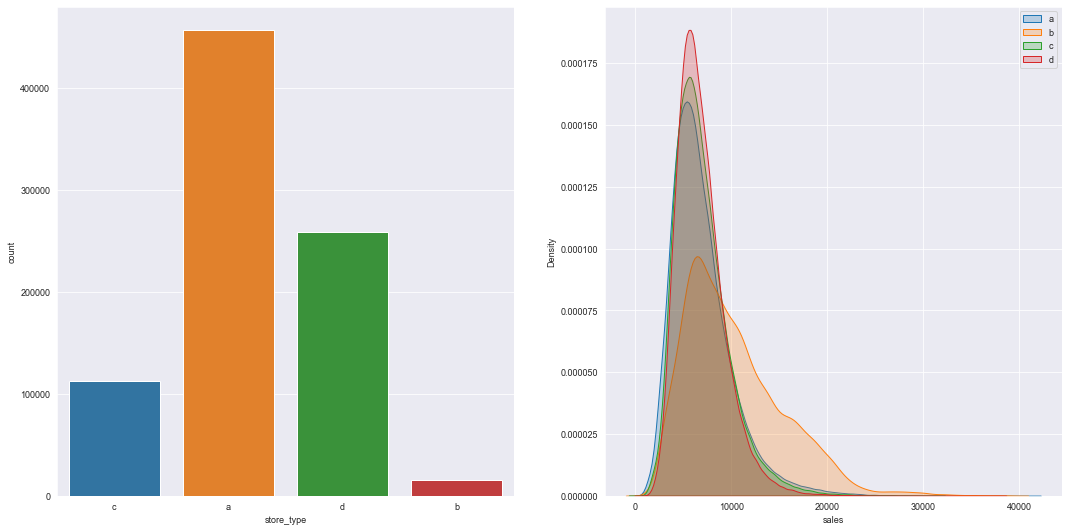

In [9]:
plt.subplot(1,2,1)
sns.countplot(x=data['store_type']);

plt.subplot(1,2,2)
plot_data = data[data['store_type'] == 'a']['sales']
sns.kdeplot(x=plot_data,label='a',shade=True);

plot_data = data[data['store_type'] == 'b']['sales']
sns.kdeplot(x=plot_data,label='b',shade=True);

plot_data = data[data['store_type'] == 'c']['sales']
sns.kdeplot(x=plot_data,label='c',shade=True);

plot_data = data[data['store_type'] == 'd']['sales']
sns.kdeplot(x=plot_data,label='d',shade=True);
plt.legend();

Again, it is possible to see some dissimilarities on data: Stores "a",c" and "d" are close on sales, but in terms of counts, "c" and "d" are far less than "a" stores. Stores with type "b" remains with very low numbers, both in terms of counts and sales. 

Finally, in the next plot the Assortments columns are analised.

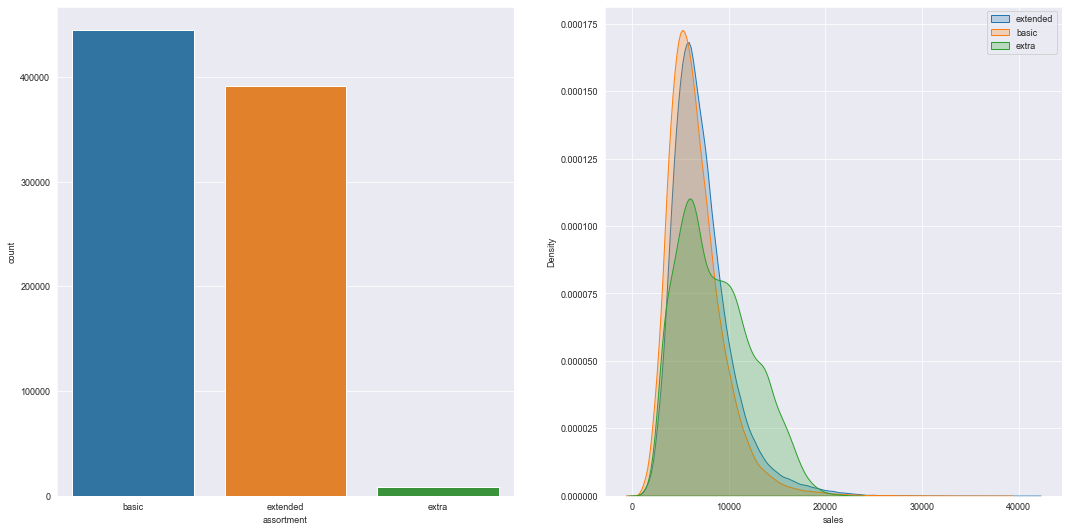

In [10]:
plt.subplot(1,2,1)
sns.countplot(x=data['assortment']);

plt.subplot(1,2,2)
plot_data = data[data['assortment'] == 'extended']['sales']
sns.kdeplot(x=plot_data,label='extended',shade=True);

plot_data = data[data['assortment'] == 'basic']['sales']
sns.kdeplot(x=plot_data,label='basic',shade=True);

plot_data = data[data['assortment'] == 'extra']['sales']
sns.kdeplot(x=plot_data,label='extra',shade=True);

plt.legend();

On the plots it is possible to see that Basic and Extended Assortments are close to each other and concentrate the marjority of Counts and Sales on the data.

## 4. Bivariate Analysis 

### Hyphotesis 1: Stores with more Assortments should sell more.

* False: Stores with more Assortments actually sell less.

This Hyphotesis can be checked simply by plotting the distribution of sales by Assortment types. 

<AxesSubplot:xlabel='assortment', ylabel='sales'>

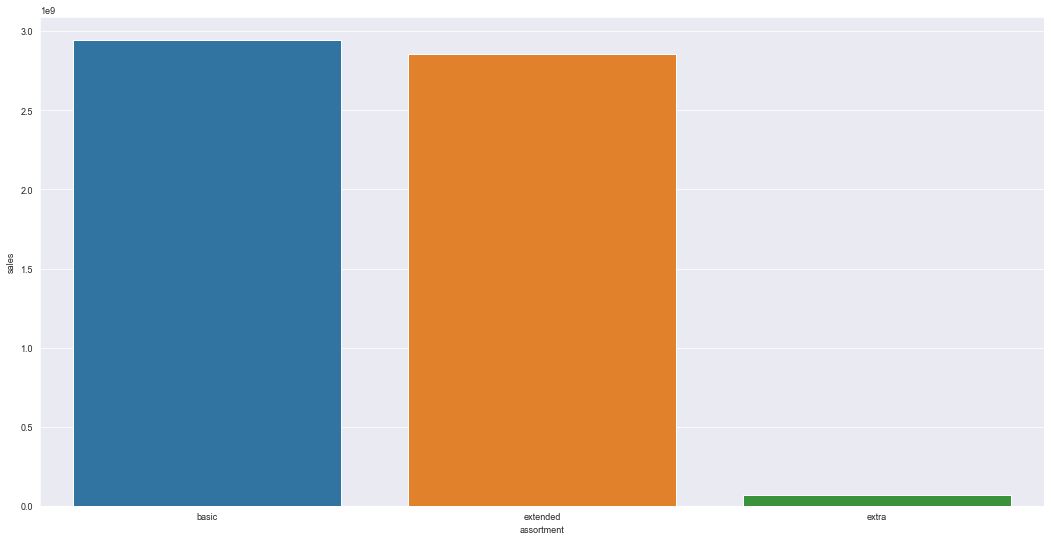

In [11]:
plot_data = data[['assortment','sales']].groupby('assortment').sum().reset_index()
sns.barplot(x='assortment',y='sales',data=plot_data)

On the chart it is clearly that Extra Size Assortment has very low sales compared to the others, invalidating the hyphotesis. But the plot just show the data in aggregated form. What if this behaviour changed over time? We can check that by plotting these distributions along time.

<AxesSubplot:xlabel='year_week'>

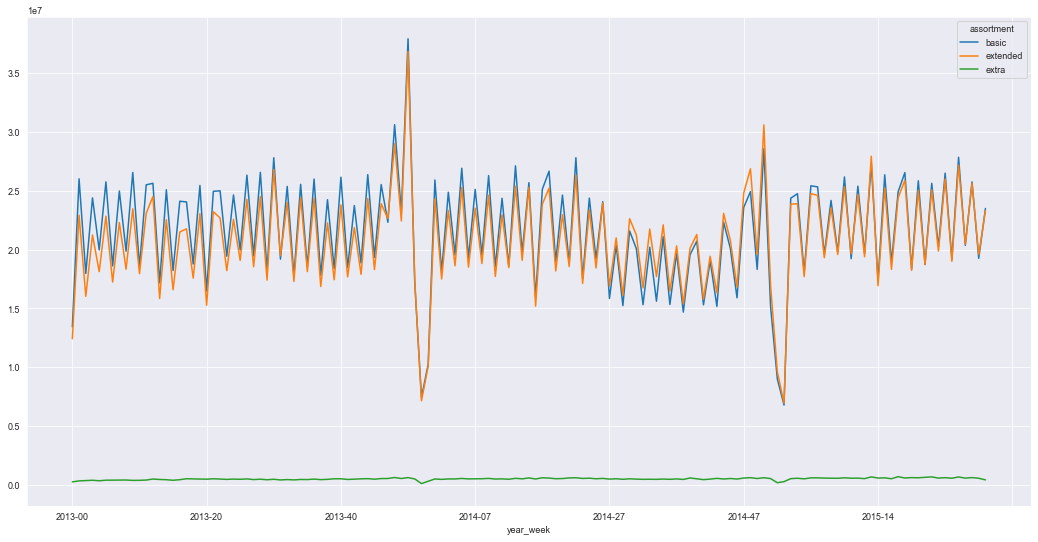

In [12]:
plot_data = data[['year_week','assortment','sales']].groupby(['year_week','assortment']).sum().reset_index()
plot_data.pivot(index='year_week',columns='assortment',values='sales').plot()

The chart above shows that the analised behaviour stays the same through time. But beyond that it is possible to see a clear seasonal behaviour on sales, which is generally common on this nature of data. We can check if this also happens on the Extra Size Assortment time series.


<AxesSubplot:xlabel='year_week'>

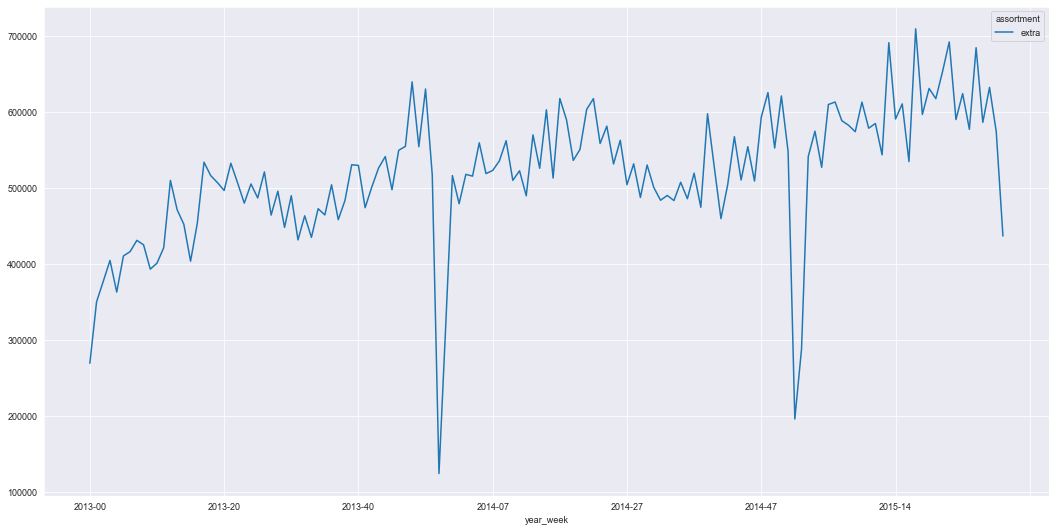

In [13]:
plot_data = data[['year_week','assortment','sales']].groupby(['year_week','assortment']).sum().reset_index()
plot_data = plot_data[plot_data['assortment']=='extra']
plot_data.pivot(index='year_week',columns='assortment',values='sales').plot()

Despite less clear, a seasonality can be also detected on this Assortment type.

### Hyphotesis 2: Stores with closer competitors should sell less.

* False: Stores with closer competitors actually sell more.

To check this hyphotesis, three plots are generated. The first just consist of a Scatter Plot of Sales by Competition Distance. The second one consists of a Heat Map showing the Correlation between Sales and Competition Distance, and the third one is a Bar Plot of Sales by Competition Distance on a binned form.

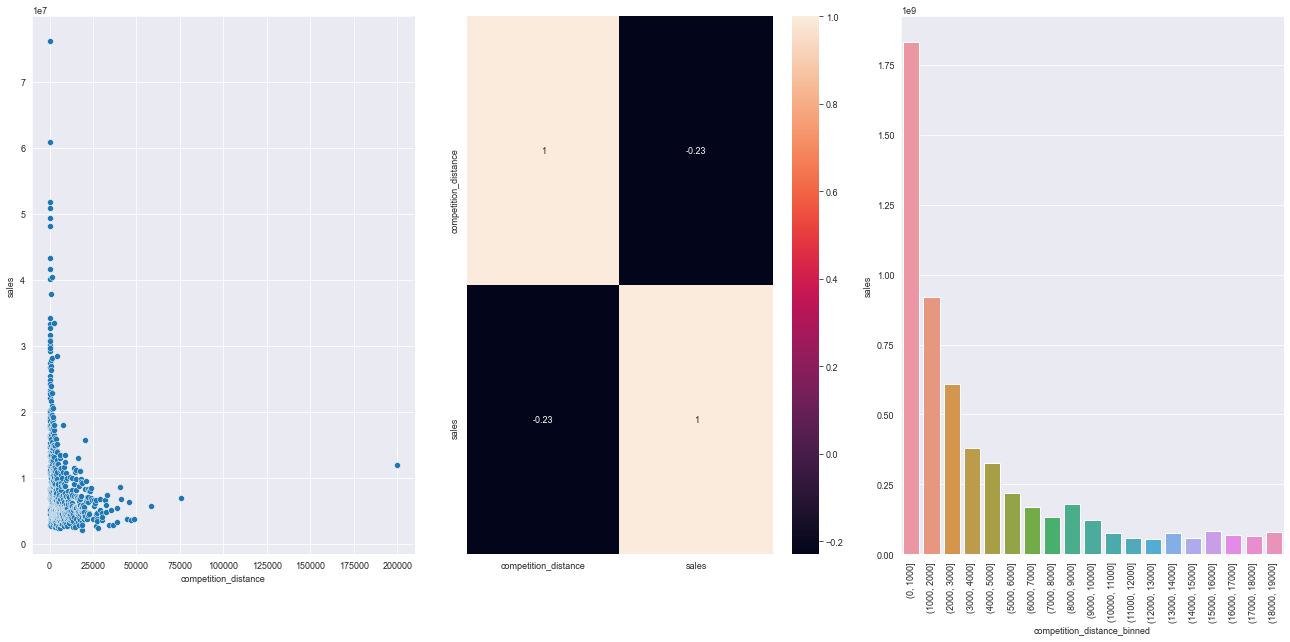

In [14]:
plot_data = data[['competition_distance','sales']].groupby('competition_distance').sum().reset_index()

plt.subplot(1,3,1)
sns.scatterplot(x='competition_distance',y='sales',data=plot_data)

plt.subplot(1,3,2)
sns.heatmap(plot_data.corr(method='pearson'),annot=True)

plt.subplot(1,3,3)
bins = list(np.arange(0,20000,1000))
plot_data['competition_distance_binned'] = pd.cut(plot_data['competition_distance'],bins=bins)
plot_data = plot_data[['competition_distance_binned','sales']].groupby('competition_distance_binned').sum().reset_index()
sns.barplot(x='competition_distance_binned',y='sales',data=plot_data)
plt.xticks(rotation=90)
plt.tight_layout()


By all the three plots, it is possible to check that the Hyphotesis considered is false. On the first and third ones, the distribution of Sales clearly shows that stores with closer competitors actually sell more and on the second one, the correlation between Sales and Competition Distance is negative, indicating that far competitors leads to less Sales.

### Hyphotesis 3: Stores with older competitors should sell more.

* False: Stores with older competitors actually sell less.

To check this hyphotesis the engineered column "Competition Time Month" is used. This column shows the difference in months between the actual date of a row and the date of the start of the competition. In that way, if this columns presents positive values, it meants that the competitor is older than the store analysed, and if we get negative values, it means the competitor was founded after the store considered. On the plots below, the distribution and correlation of Sales by "Competition Time Month" are presented.

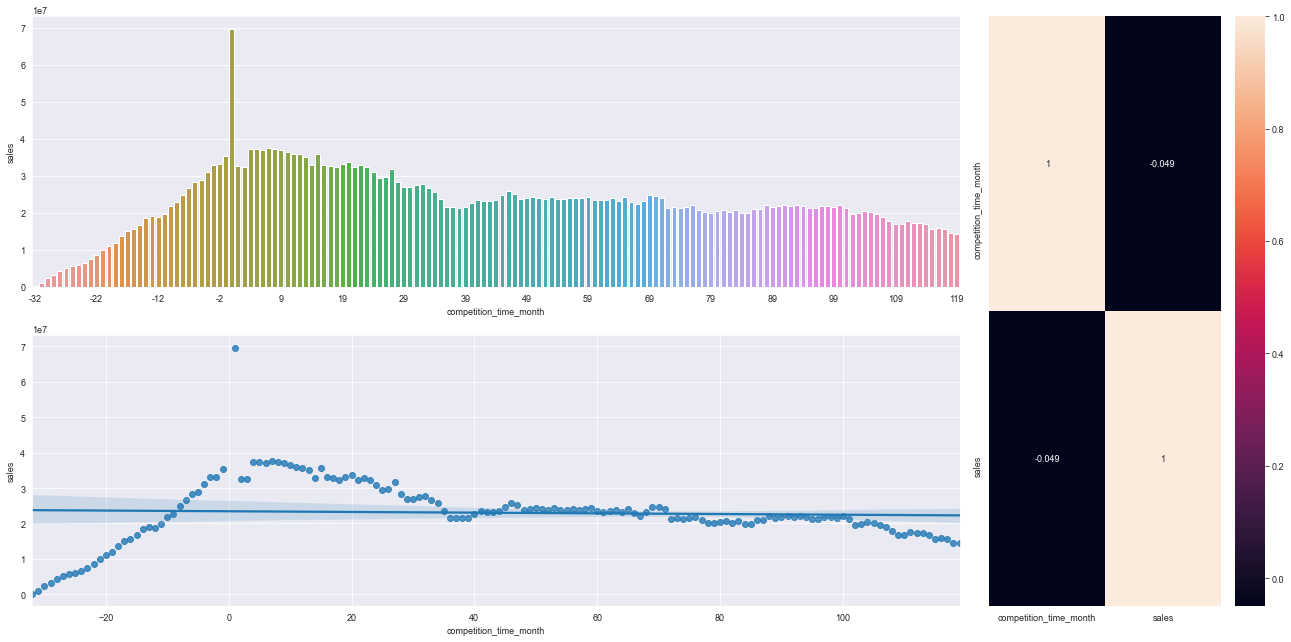

In [15]:
grid = GridSpec(2,4)

plt.subplot(grid[0,:3])
plot_data = data[['competition_time_month','sales']].groupby('competition_time_month').sum().reset_index()
plot_data = plot_data[(plot_data['competition_time_month'] < 120) & (plot_data['competition_time_month'] != 0)]
ax = sns.barplot(x='competition_time_month',y='sales',data=plot_data)
plt.tight_layout()
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))

plt.subplot(grid[1,:3])
sns.regplot(x='competition_time_month',y='sales',data=plot_data)

plt.subplot(grid[:,3])
sns.heatmap(plot_data.corr(method='pearson'),annot=True)
plt.tight_layout()

As it is possible to see, Sales actualy grow close to the start of the Competition Time and shrink slowly after that. The correlation, despite being negative, it is too small to be considered. So, considering the charts on the left, the hyphotesis can be considered false.

### Hyphotesis 4: Stores with longer active promotions should sell more.

* False: Stores with longer active promotions actually sell less, after a certain period of promotion.

To check this hyphotesis, the engineered "Promo Time Week" is used. This column represents the difference between the actual date of a row and the start of a promotion. So, as in the "Competition Time Month" column, negative values mean weeks before the start of a promotion, and positive values indicate weeks after the promotion started.

<AxesSubplot:>

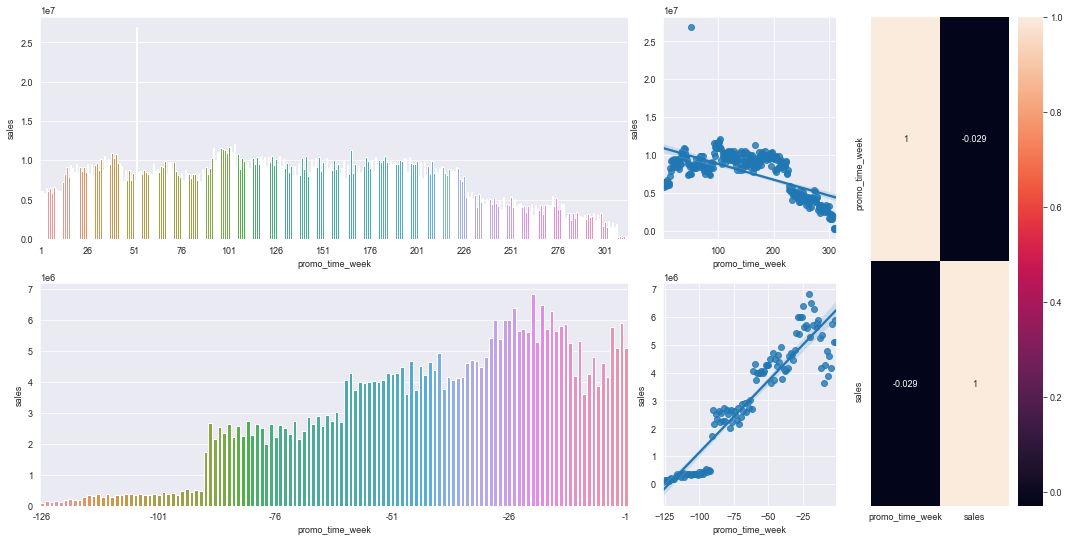

In [16]:
plot_data = data[['promo_time_week','sales']].groupby('promo_time_week').sum().reset_index()

grid = GridSpec(2,5)

plt.subplot(grid[0,:3])
subplot_data = plot_data[plot_data['promo_time_week'] > 0]
ax = sns.barplot(x='promo_time_week',y='sales',data=subplot_data)
ax.xaxis.set_major_locator(ticker.MultipleLocator(25))

plt.subplot(grid[0,3])
sns.regplot(x='promo_time_week',y='sales',data=subplot_data)

plt.subplot(grid[1,:3])
subplot_data = plot_data[plot_data['promo_time_week'] < 0]
ax = sns.barplot(x='promo_time_week',y='sales',data=subplot_data)
ax.xaxis.set_major_locator(ticker.MultipleLocator(25))

plt.subplot(grid[1,3])
sns.regplot(x='promo_time_week',y='sales',data=subplot_data)

plt.subplot(grid[:,4])
sns.heatmap(plot_data.corr(method='pearson'),annot=True)

The results are quite interesting. Before the promotion starts, sales grows considerably. But after that, sales remains on a high selling for a long time and after that stores start to sell less. These behaviours before and after the start of promotions can also be seen on the regplots on the middle. The correlation, again, seens inconclusive.

In [17]:
data['promo_time_week'].min()

-126

### Hyphotesis 5: Stores with more consectuive promotions should sell more.

* False: Stores with more consecutive promotions actually sell less.

For this hyphotesis, a comparation of sales between stores that runned the traditional and extended promotions is compared to stores that runned only the extended one along time.

In [18]:
data[['promo','promo2','sales']].groupby(['promo','promo2']).sum().reset_index()

,promo,promo2,sales
0,0,0,1482612096
1,0,1,1289362241
2,1,0,1628930532
3,1,1,1472275754


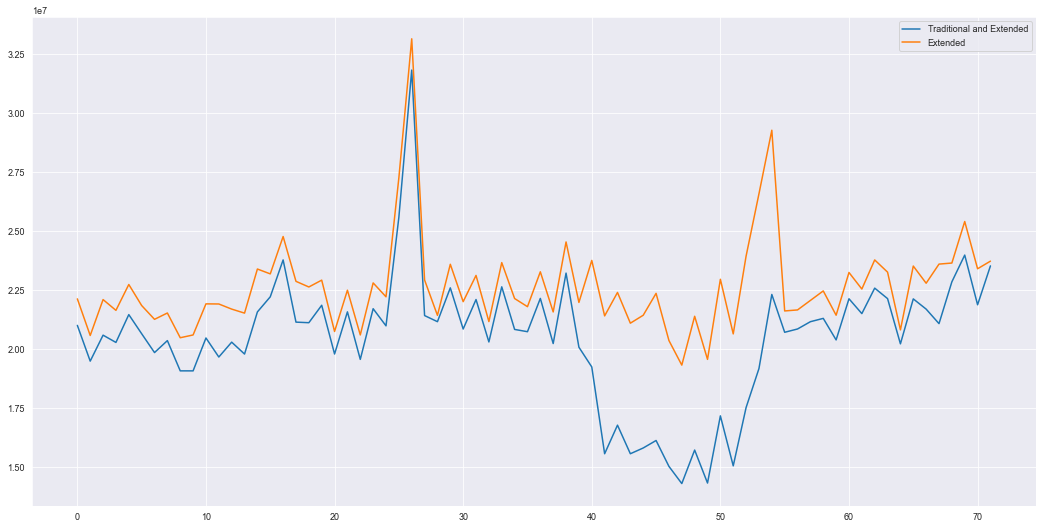

In [19]:
plot_data = data[(data['promo']==1) & (data['promo2']==1)][['year_week','sales']].groupby('year_week').sum().reset_index()
ax = plot_data.plot()


plot_data = data[(data['promo']==1) & (data['promo2']==0)][['year_week','sales']].groupby('year_week').sum().reset_index()
ax = plot_data.plot(ax=ax)

ax.legend(labels=['Traditional and Extended','Extended'])

It is possible to see that , despite a low region between 40 and 50 week of year, the two kind of stores presents very similar behaviours. So the hyphotesis considered seens false.

### Hyphotesis 6: Stores open during Christmas shoudl sell more.

*False: Stores open during christmas actually sell less.

 A simple comparation between Sales on different holidays is sufficient to check this hyphotesis.

<AxesSubplot:xlabel='year', ylabel='sales'>

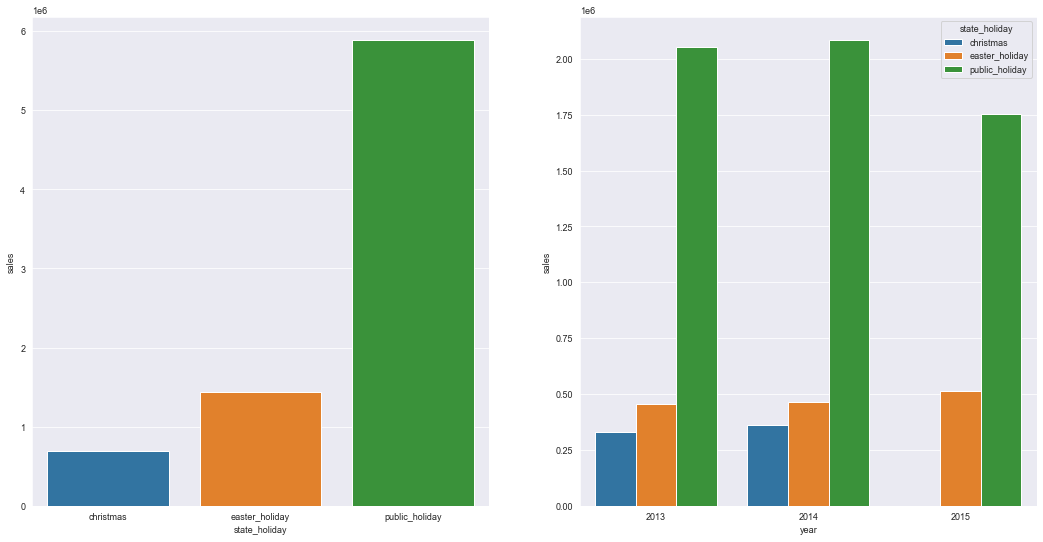

In [20]:
plot_data = data[data['state_holiday'] != 'regular_day']

plt.subplot(1,2,1)
subplot_data = plot_data[['state_holiday','sales']].groupby('state_holiday').sum().reset_index()
sns.barplot(x='state_holiday',y='sales',data=subplot_data)

plt.subplot(1,2,2)
subplot_data = plot_data[['year','state_holiday','sales']].groupby(['year','state_holiday']).sum().reset_index()
sns.barplot(x='year',y='sales',hue='state_holiday',data=subplot_data)

By looking the chart on left, it is possible to see that, in general, Christmas is the holiday with least sales. To confirm that this behaviour don't change through time the plot on the right shows the distribution of sales on different years, confirming that the hyphotesis is false.

### Hyphotesis 7: Stores should sell more along the years.

* False: Stores actually sell less along the years.

To check this hyphotesis, a plot of Sales over years is sufficient. A correlation plot can also be analised.

<AxesSubplot:>

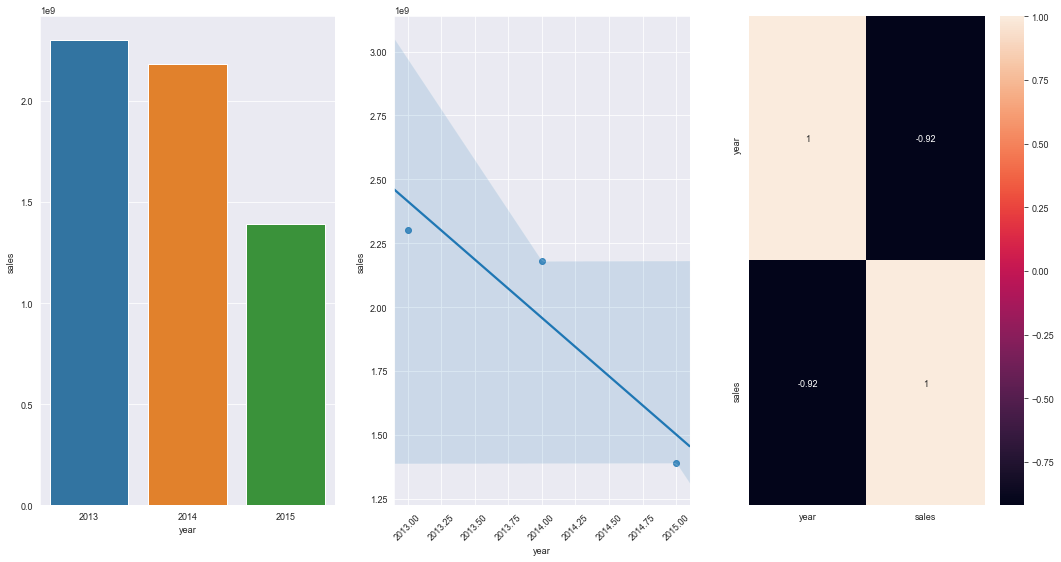

In [21]:
plot_data = data[['year','sales']].groupby('year').sum().reset_index()

plt.subplot(1,3,1)
sns.barplot(x='year',y='sales',data=plot_data)

plt.subplot(1,3,2)
sns.regplot(x='year',y='sales',data=plot_data,truncate=False)
plt.xticks(rotation=45)

plt.subplot(1,3,3)
sns.heatmap(plot_data.corr(method='pearson'),annot=True)

By the barpolt on left, it is possible to see that sales are shriking along the years, but we have to consider the fact that 2015 year is still not complete on the dataframe. Because of that the correlation is extremely negative. By that, the hyphotesis seens false.

### Hyphotesis 8: Stores should sell more on the second semester of the year.

* False: Stores actually sell less on the second semester of the year.

Let's check the aggregated sales by Month to confirm this hyphotesis. Correlation, once again is also checked.

<AxesSubplot:>

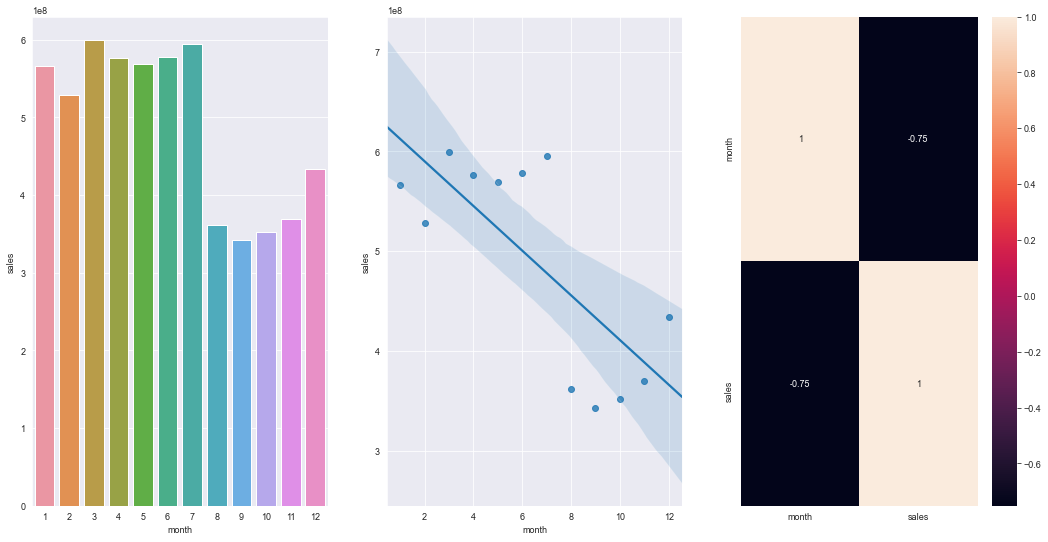

In [22]:
plot_data = data[['month','sales']].groupby('month').sum().reset_index()

plt.subplot(1,3,1)
sns.barplot(x='month',y='sales',data=plot_data)

plt.subplot(1,3,2)
sns.regplot(x='month',y='sales',data=plot_data,truncate=False)

plt.subplot(1,3,3)
sns.heatmap(plot_data.corr(method='pearson'),annot=True)

From the left bar plot, it is clear that Sales decrease at the second semester. This behaviour is also observable on the regplot and heatmap that shows a high negative correlation of Sales and Month.

### Hyphotesis 9: Stores should sell more after day 10 of each month.

* True: Stores sell more after day 10 of each month.

For this hyphotesis, we'll start by first plotting the aggregated sales by day of month, their correlation and then compare sales before and after day 10.

<AxesSubplot:xlabel='before_after', ylabel='sales'>

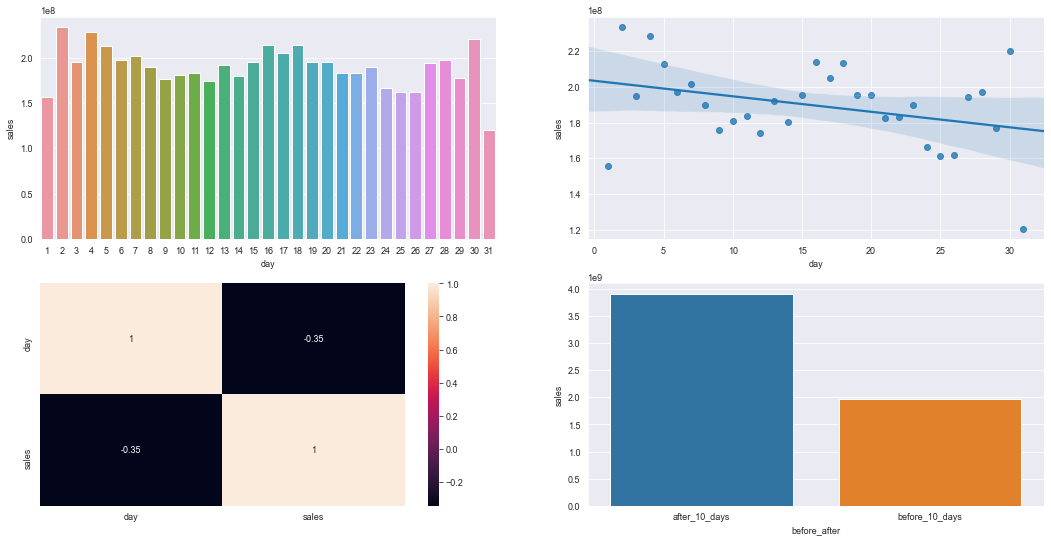

In [23]:
plot_data = data[['day','sales']].groupby('day').sum().reset_index()

plt.subplot(2,2,1)
sns.barplot(x='day',y='sales',data=plot_data)

plt.subplot(2,2,2)
sns.regplot(x='day',y='sales',data=plot_data,truncate=False)

plt.subplot(2,2,3)
sns.heatmap(plot_data.corr(method='pearson'),annot=True)

plt.subplot(2,2,4)
plot_data['before_after'] = plot_data['day'].apply(lambda x: 'before_10_days' if x <= 10 else 'after_10_days')
plot_data = plot_data[['before_after','sales']].groupby('before_after').sum().reset_index()
sns.barplot(x='before_after',y='sales',data=plot_data)

Along a months, sales appears to be very constant. So, it is obvious to see that stores will sell more after day 10 because of the longer period. So the hyphotesis is true.

### Hyphotesis 10: Stores should sell less during weekends.

* True: Stores sell less during weekends.

For this one, let's check the aggregated sales by day of week and the related correlation.

<AxesSubplot:>

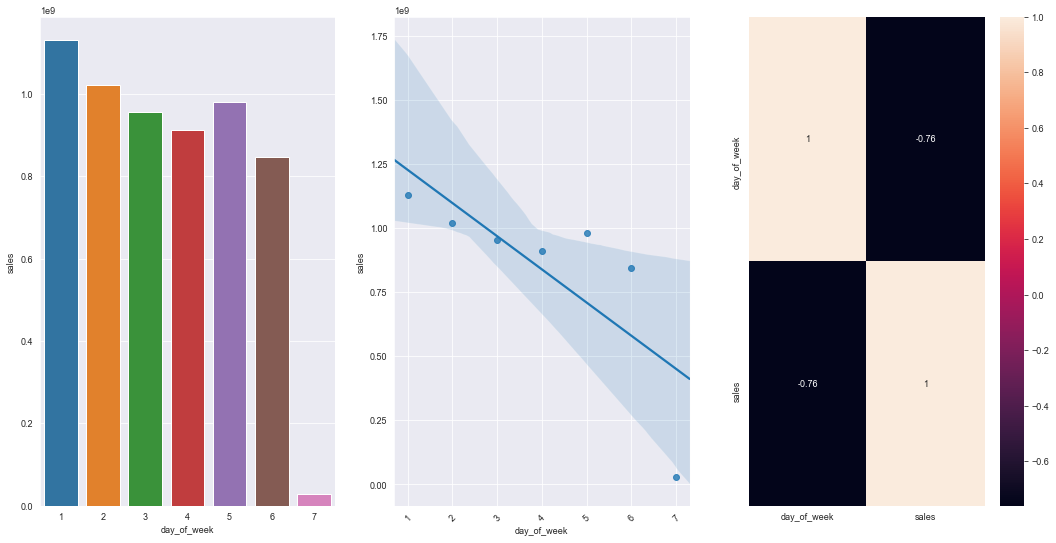

In [24]:
plot_data = data[['day_of_week','sales']].groupby('day_of_week').sum().reset_index()

plt.subplot(1,3,1)
sns.barplot(x='day_of_week',y='sales',data=plot_data)

plt.subplot(1,3,2)
sns.regplot(x='day_of_week',y='sales',data=plot_data,truncate=False)
plt.xticks(rotation=45)

plt.subplot(1,3,3)
sns.heatmap(plot_data.corr(method='pearson'),annot=True)

From the bar chart on the left, it is possible to see that sales decrease along the week, having it's minimum on weekend. The strong negative correlation also contributes to confirm that the hyphotesis is true.

### Hyphotesis 11: Stores should sell less during School Holidays.

* True: Stores sell less during school holidays, except on July and August.

For this final hyphotesis, let's check the aggregated sales during School Holidays and compare to other days. We also check this plot on different months of the year.

<AxesSubplot:xlabel='month', ylabel='sales'>

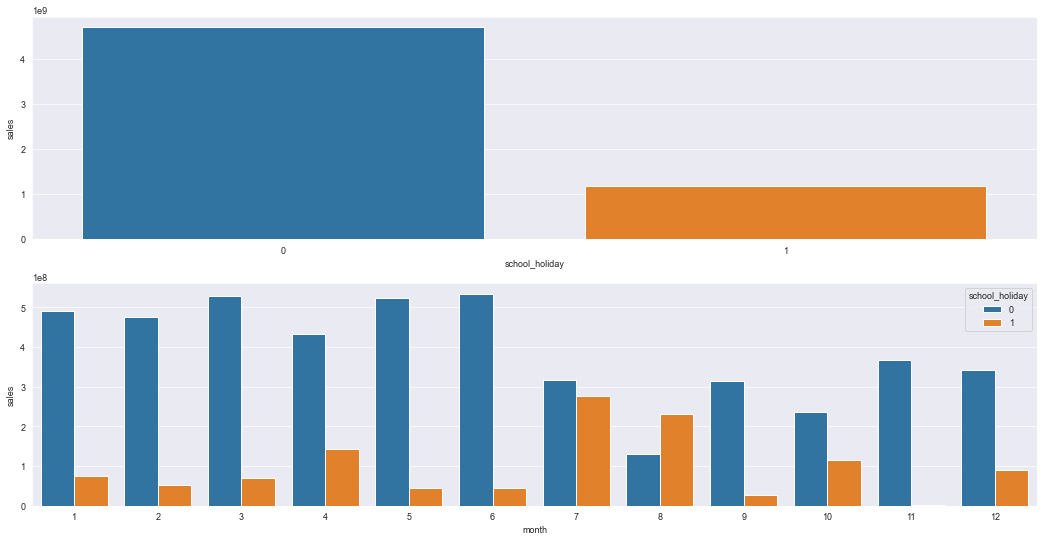

In [25]:
plt.subplot(2,1,1)
plot_data = data[['school_holiday','sales']].groupby('school_holiday').sum().reset_index()
sns.barplot(x='school_holiday',y='sales',data=plot_data)

plt.subplot(2,1,2)
plot_data = data[['month','school_holiday','sales']].groupby(['month','school_holiday']).sum().reset_index()
sns.barplot(x='month',y='sales',hue='school_holiday',data=plot_data)

As it is possible to see, sales decrease during school holidays, and this behaviour remains the same in almost all months, except on July and August, where te opposite happens. So, in general, the hyphotesis is true.

## 5. Multivariate Analysis

On this final section, analysis envolving more than two variables are proposed. Again, this section is divided for numerical and categorical features.


### Numerical Features

For the numerical features, a heatmap with the correlation between all variables is proposed.

<AxesSubplot:>

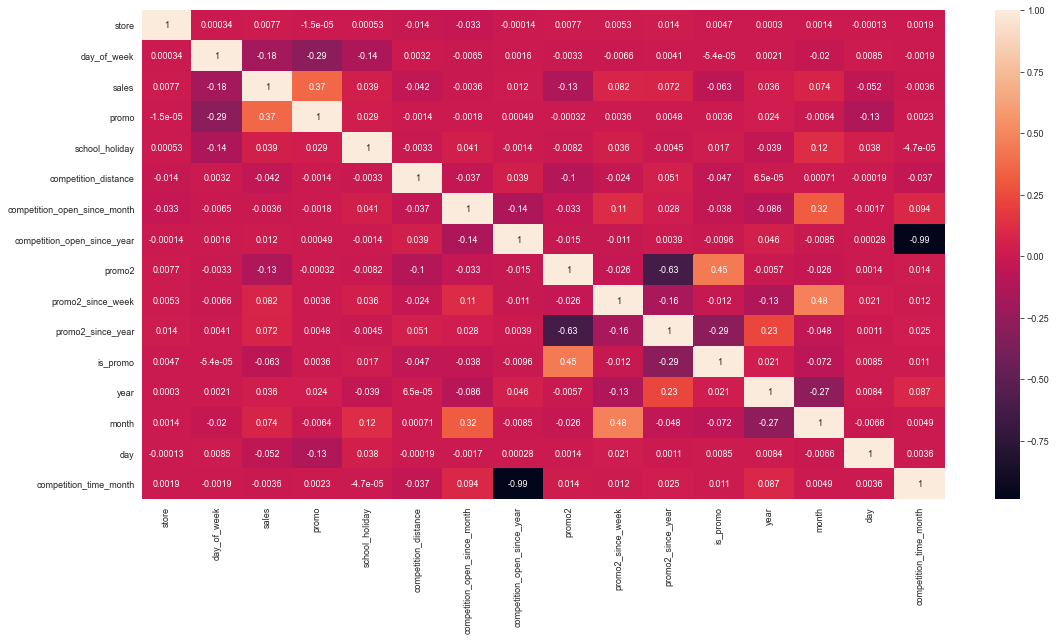

In [26]:
correlation = num_attributes.corr(method='pearson')
sns.heatmap(correlation,annot=True)

Besides some strong correlations involving similar concept columns, like "Competition Open Since Year" and "Competition Time Month", it is not possible to see any meaningful relation between variables.

### Categorical Features

For the categorical features, a heatmap is also proposed. But differently from the numerical features, a proper measure of correlation should be used. So in this work, the Cramer-V measure is used and inplemented below. 

In [27]:
def cramer_v(x,y):    
    cm = pd.crosstab(x,y).values 
    n = cm.sum()
    r,k = cm.shape

    chi2 = chi2_contingency(cm)[0]
    chi2corr = max(0,chi2 - (k-1)*(r-1)/(n-1))
    kcorr = k - (k-1)**2/(n-1)
    rcorr = r - (r-1)**2/(n-1)
    v = np.sqrt((chi2corr/n) / (min(kcorr-1,rcorr-1)))
    return v

In [28]:
a1 = cramer_v(cat_attributes['state_holiday'],cat_attributes['state_holiday'])
a2 = cramer_v(cat_attributes['state_holiday'],cat_attributes['store_type'])
a3 = cramer_v(cat_attributes['state_holiday'],cat_attributes['assortment'])

a4 = cramer_v(cat_attributes['store_type'],cat_attributes['state_holiday'])
a5 = cramer_v(cat_attributes['store_type'],cat_attributes['store_type'])
a6 = cramer_v(cat_attributes['store_type'],cat_attributes['assortment'])

a7 = cramer_v(cat_attributes['assortment'],cat_attributes['state_holiday'])
a8 = cramer_v(cat_attributes['assortment'],cat_attributes['store_type'])
a9 = cramer_v(cat_attributes['assortment'],cat_attributes['assortment'])

In [29]:
correlation = pd.DataFrame({'state_holiday':[a1,a2,a3],
              'store_type':[a4,a5,a6],
              'assortment':[a7,a8,a9]})
correlation = correlation.set_index(correlation.columns)

<AxesSubplot:>

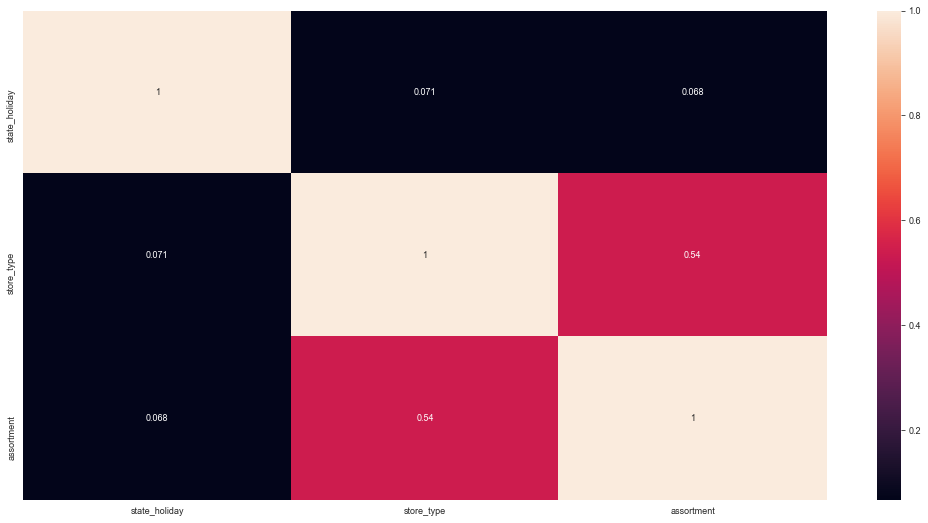

In [30]:
sns.heatmap(correlation,annot=True)

On the resulting chart, it is possible to see a meaningful relation between Store Type and Assortment which may indicate that different Store Types works with different Assortments.